In [1]:
# KNN 

In [2]:
import pandas as pd
#Dataframe
df =pd.read_csv('../final_cleaned.csv')


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# Séparation des features (X) et de la variable cible (y)
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Division des données en ensembles d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Division de l'ensemble d'entraînement en ensembles d'entraînement et de validation (20% parmi 80% pour la validation)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [4]:
from sklearn.neighbors import KNeighborsClassifier


# Création du modèle KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Vous pouvez ajuster le nombre de voisins selon Le besoins
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [5]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score


# Prédiction sur l'ensemble de validation
y_pred_validation = knn_model.predict(X_validation)

# Calcul des métriques sur l'ensemble de validation
accuracy_validation = accuracy_score(y_validation, y_pred_validation)
precision_validation = precision_score(y_validation, y_pred_validation)
recall_validation = recall_score(y_validation, y_pred_validation)
f1_validation = f1_score(y_validation, y_pred_validation)
auc_validation = roc_auc_score(y_validation, y_pred_validation)

# Affichage des métriques sur l'ensemble de validation
print("Métriques sur l'ensemble de validation:")
print(f"Accuracy: {accuracy_validation:.2f}")
print(f"Precision: {precision_validation:.2f}")
print(f"Recall: {recall_validation:.2f}")
print(f"F1-Score: {f1_validation:.2f}")
print(f"auc-Score: {auc_validation:.2f}")


Métriques sur l'ensemble de validation:
Accuracy: 0.96
Precision: 0.95
Recall: 0.97
F1-Score: 0.96
auc-Score: 0.96


In [6]:
# Prédiction sur l'ensemble de test

y_pred_test = knn_model.predict(X_test)


# Calcul des métriques sur l'ensemble de test

acc = accuracy_score(y_test, y_pred_test)
prec = precision_score(y_test, y_pred_test)
rec = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
# Calcul de l'AUC
auc = roc_auc_score(y_test, y_pred_test)

knn_results = pd.DataFrame([['KNN', acc,prec,rec, f1, auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])

# Sauvegardez le DataFrame dans un fichier CSV
knn_results.to_csv('../evaluations/knn_results.csv', index=False)

knn_results


,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,KNN,0.956482,0.953333,0.959732,0.956522,0.95649


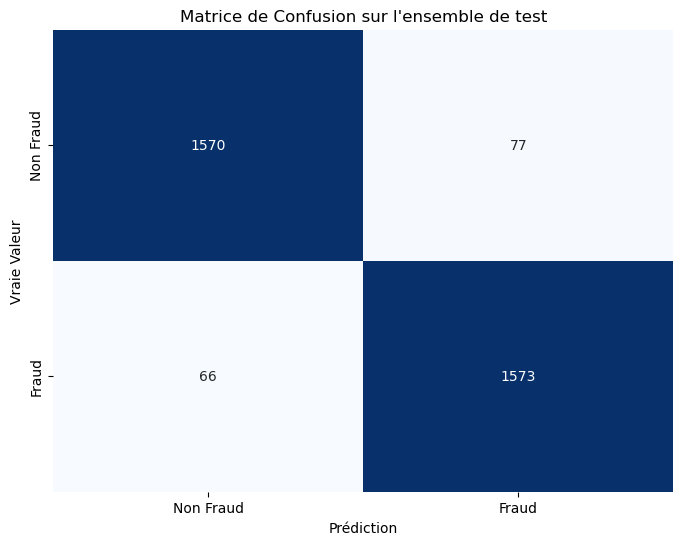

In [7]:

# Matrice de confusion sur l'ensemble de test
conf_matrix = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Non Fraud', 'Fraud'], yticklabels=['Non Fraud', 'Fraud'])
plt.xlabel('Prédiction')
plt.ylabel('Vraie Valeur')
plt.title('Matrice de Confusion sur l\'ensemble de test')
plt.show()
